# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
from itertools import count

from numpy.ma.extras import unique
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
# shape of the dfs

print(
    f'{df_hh_income.shape}\n{df_pct_poverty.shape}\n{df_pct_completed_hs.shape}\n{df_share_race_city.shape}\n{df_fatalities.shape}')

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
# rows and columns

# rows
print(
    f'Number of rows:\n{df_hh_income.shape[0]}\n{df_pct_poverty.shape[0]}\n{df_pct_completed_hs.shape[0]}\n{df_share_race_city.shape[0]}\n{df_fatalities.shape[0]}')
# columns
print(
    f'Number of columns:\n{df_hh_income.shape[1]}\n{df_pct_poverty.shape[1]}\n{df_pct_completed_hs.shape[1]}\n{df_share_race_city.shape[1]}\n{df_fatalities.shape[1]}')

Number of rows:
29322
29329
29329
29268
2535
Number of columns:
3
3
3
7
14


In [7]:
# column names

print(
    f'Column names:\n{df_hh_income.columns}\n{df_pct_poverty.columns}\n{df_pct_completed_hs.columns}\n{df_share_race_city.columns}\n{df_fatalities.columns}\n')

Column names:
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')



In [8]:
# check for NaN

print(
    f'Check NaN:\n{df_hh_income.isnull().mean() * 100}\n{df_pct_poverty.isnull().mean() * 100}\n{df_pct_completed_hs.isnull().mean() * 100}\n{df_share_race_city.isnull().mean() * 100}\n{df_fatalities.isnull().mean() * 100}')

Check NaN:
Geographic Area   0.00
City              0.00
Median Income     0.17
dtype: float64
Geographic Area   0.00
City              0.00
poverty_rate      0.00
dtype: float64
Geographic Area        0.00
City                   0.00
percent_completed_hs   0.00
dtype: float64
Geographic area         0.00
City                    0.00
share_white             0.00
share_black             0.00
share_native_american   0.00
share_asian             0.00
share_hispanic          0.00
dtype: float64
id                        0.00
name                      0.00
date                      0.00
manner_of_death           0.00
armed                     0.36
age                       3.04
gender                    0.00
race                      7.69
city                      0.00
state                     0.00
signs_of_mental_illness   0.00
threat_level              0.00
flee                      2.56
body_camera               0.00
dtype: float64


In [9]:
# check for duplicates

print(
    f'Check Duplicates:\n{df_hh_income.duplicated().mean() * 100}\n{df_pct_poverty.duplicated().mean() * 100}\n{df_pct_completed_hs.duplicated().mean() * 100}\n{df_share_race_city.duplicated().mean() * 100}\n{df_fatalities.duplicated().mean() * 100}')

Check Duplicates:
0.0
0.0
0.0
0.0
0.0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
# replace NaN with zero

df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)

In [11]:
# drop duplicates

df_pct_completed_hs.drop_duplicates(inplace=True)
df_fatalities.drop_duplicates(inplace=True)
df_hh_income.drop_duplicates(inplace=True)
df_share_race_city.drop_duplicates(inplace=True)
df_pct_poverty.drop_duplicates(inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
# make bar plot using seaborn library (df --> df_pct_poverty)

# drop city column
new_df = df_pct_poverty.drop('City', axis=1)

# convert poverty_rate column from object , to numerical
new_df['poverty_rate'] = pd.to_numeric(new_df['poverty_rate'], errors='coerce')

# group by State (Geographic Area)
group_by_state = new_df.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

# convert it to df
df = pd.DataFrame(group_by_state)

df

Geographic Area  poverty_rate
0               AK         19.85
1               AL         20.65
2               AR         22.96
3               AZ         25.67
4               CA         17.12
5               CO         13.36
6               CT          9.14
7               DC         18.00
8               DE         12.56
9               FL         17.57
10              GA         23.78
11              HI         13.40
12              IA         12.29
13              ID         18.24
14              IL         13.88
15              IN         15.50
16              KS         14.76
17              KY         20.08
18              LA         22.34
19              MA          9.59
20              MD         10.31
21              ME         16.89
22              MI         17.90
23              MN         13.75
24              MO         20.11
25              MS         26.88
26              MT         16.51
27              NC         19.75
28              ND         12.16
29              NE         12.98
30              NH         12.66
31              NJ          8.19
32              NM         23.08
33              NV         12.47
34              NY         11.67
35              OH         14.85
36              OK         20.66
37              OR         16.52
38              PA         12.52
39              RI         10.37
40              SC         22.16
41              SD         16.03
42              TN         19.89
43              TX         19.92
44              UT         11.98
45              VA         14.59
46              VT         13.79
47              WA         15.02
48              WI         12.86
49              WV         21.13
50              WY          9.89

C:\Users\nick-\AppData\Local\Temp\ipykernel_17112\1366587316.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Geographic Area', y='poverty_rate', palette=colors, legend=False)


<Axes: title={'center': 'Poverty Rate In Each State'}, xlabel='Geographic Area', ylabel='poverty_rate'>

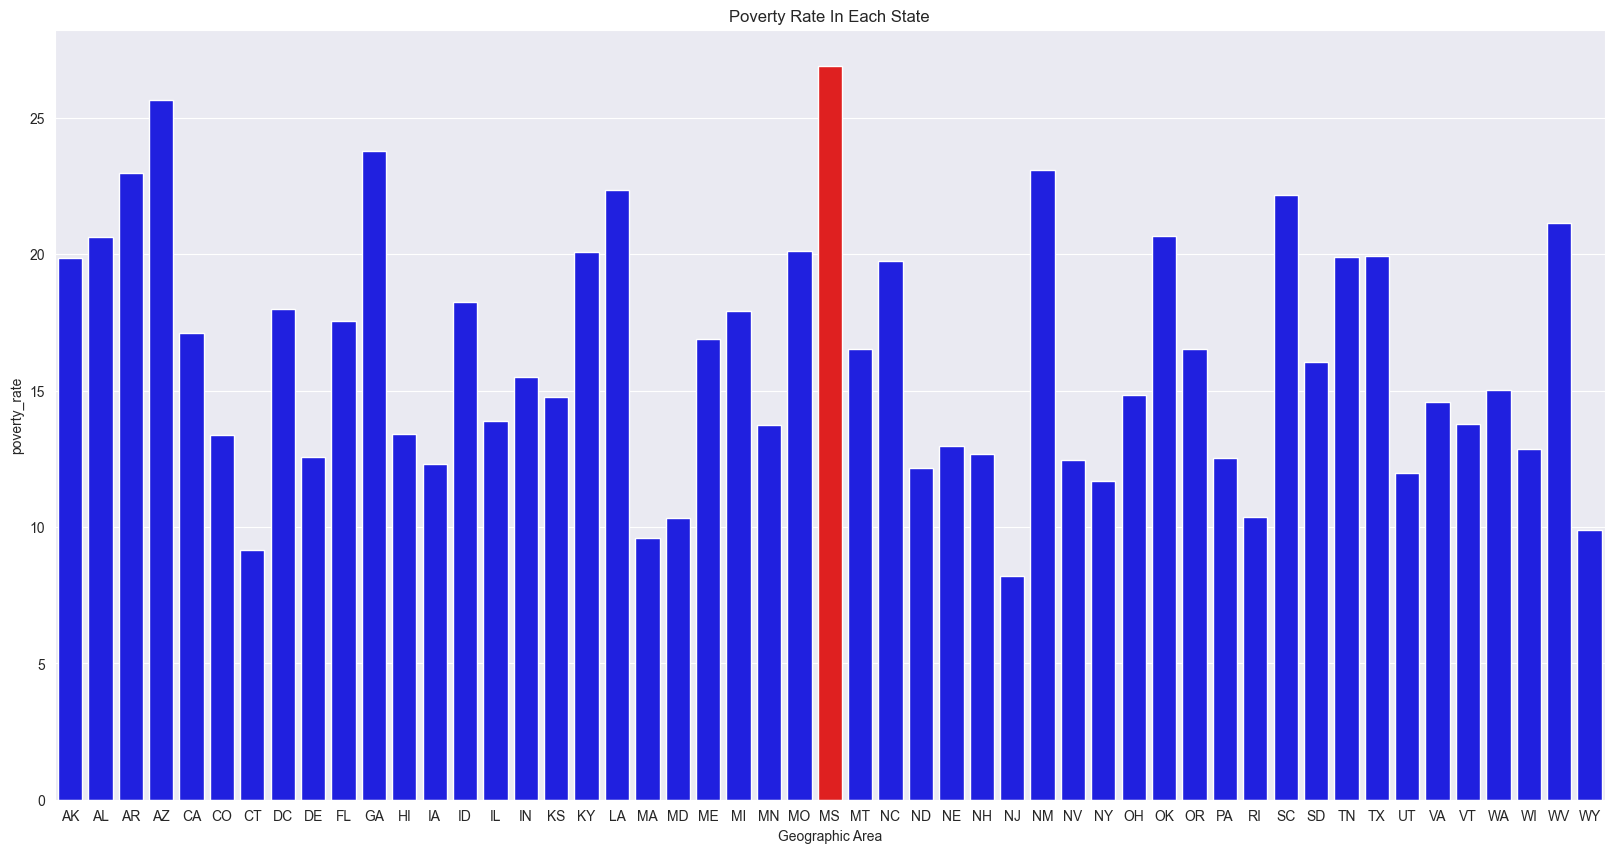

In [13]:
# make barplot

plt.figure(figsize=(20, 10))
plt.title('Poverty Rate In Each State')

# find max poverty state. We will indicate it , using a unique color
# find the max index
max_index = df['poverty_rate'].idxmax()

# define the color
colors = ['red' if i == max_index else 'blue' for i in range(len(df))]

sns.barplot(data=df, x='Geographic Area', y='poverty_rate', palette=colors, legend=False)

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

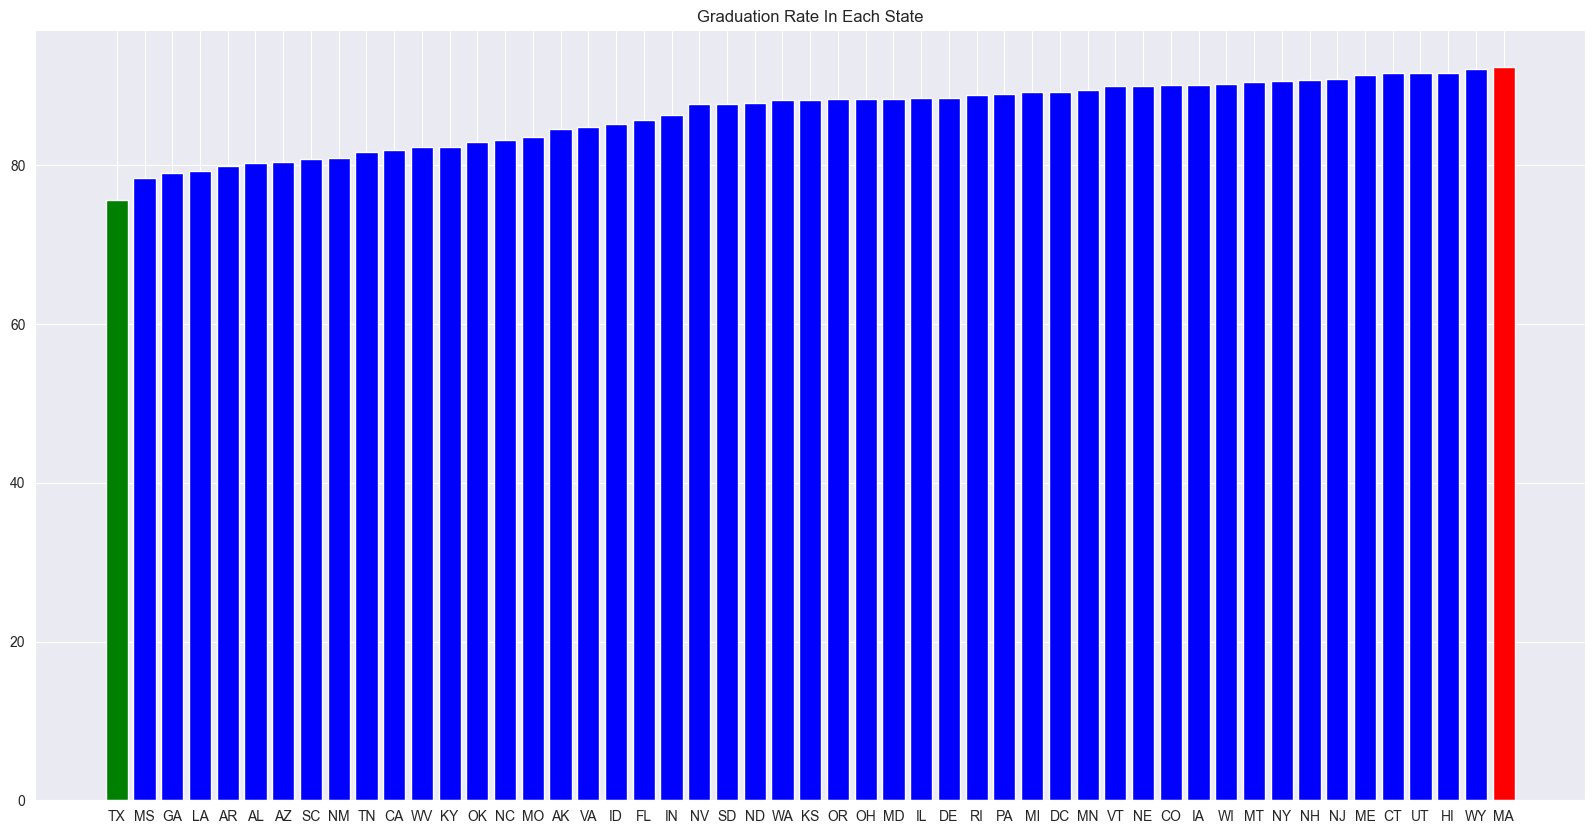

In [14]:
# drop City column
new_df = df_pct_completed_hs.drop('City', axis=1)

# convert percent completed to numerical
new_df['percent_completed_hs'] = pd.to_numeric(new_df['percent_completed_hs'], errors='coerce')

# group by State
group_by_state = new_df.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

# convert it to df
df2 = pd.DataFrame(group_by_state)

# sort values Ascending
sorted_ascending = df2.sort_values(by='percent_completed_hs', ascending=True)

# find min index
min_index = sorted_ascending['percent_completed_hs'].idxmin()

# find max index
max_index = sorted_ascending['percent_completed_hs'].idxmax()

# make plot
plt.figure(figsize=(20, 10))
plt.title('Graduation Rate In Each State')

for i, row in sorted_ascending.iterrows():
    color = 'red' if i == max_index else 'green' if i == min_index else 'blue'
    plt.bar(row['Geographic Area'], row['percent_completed_hs'], color=color)

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

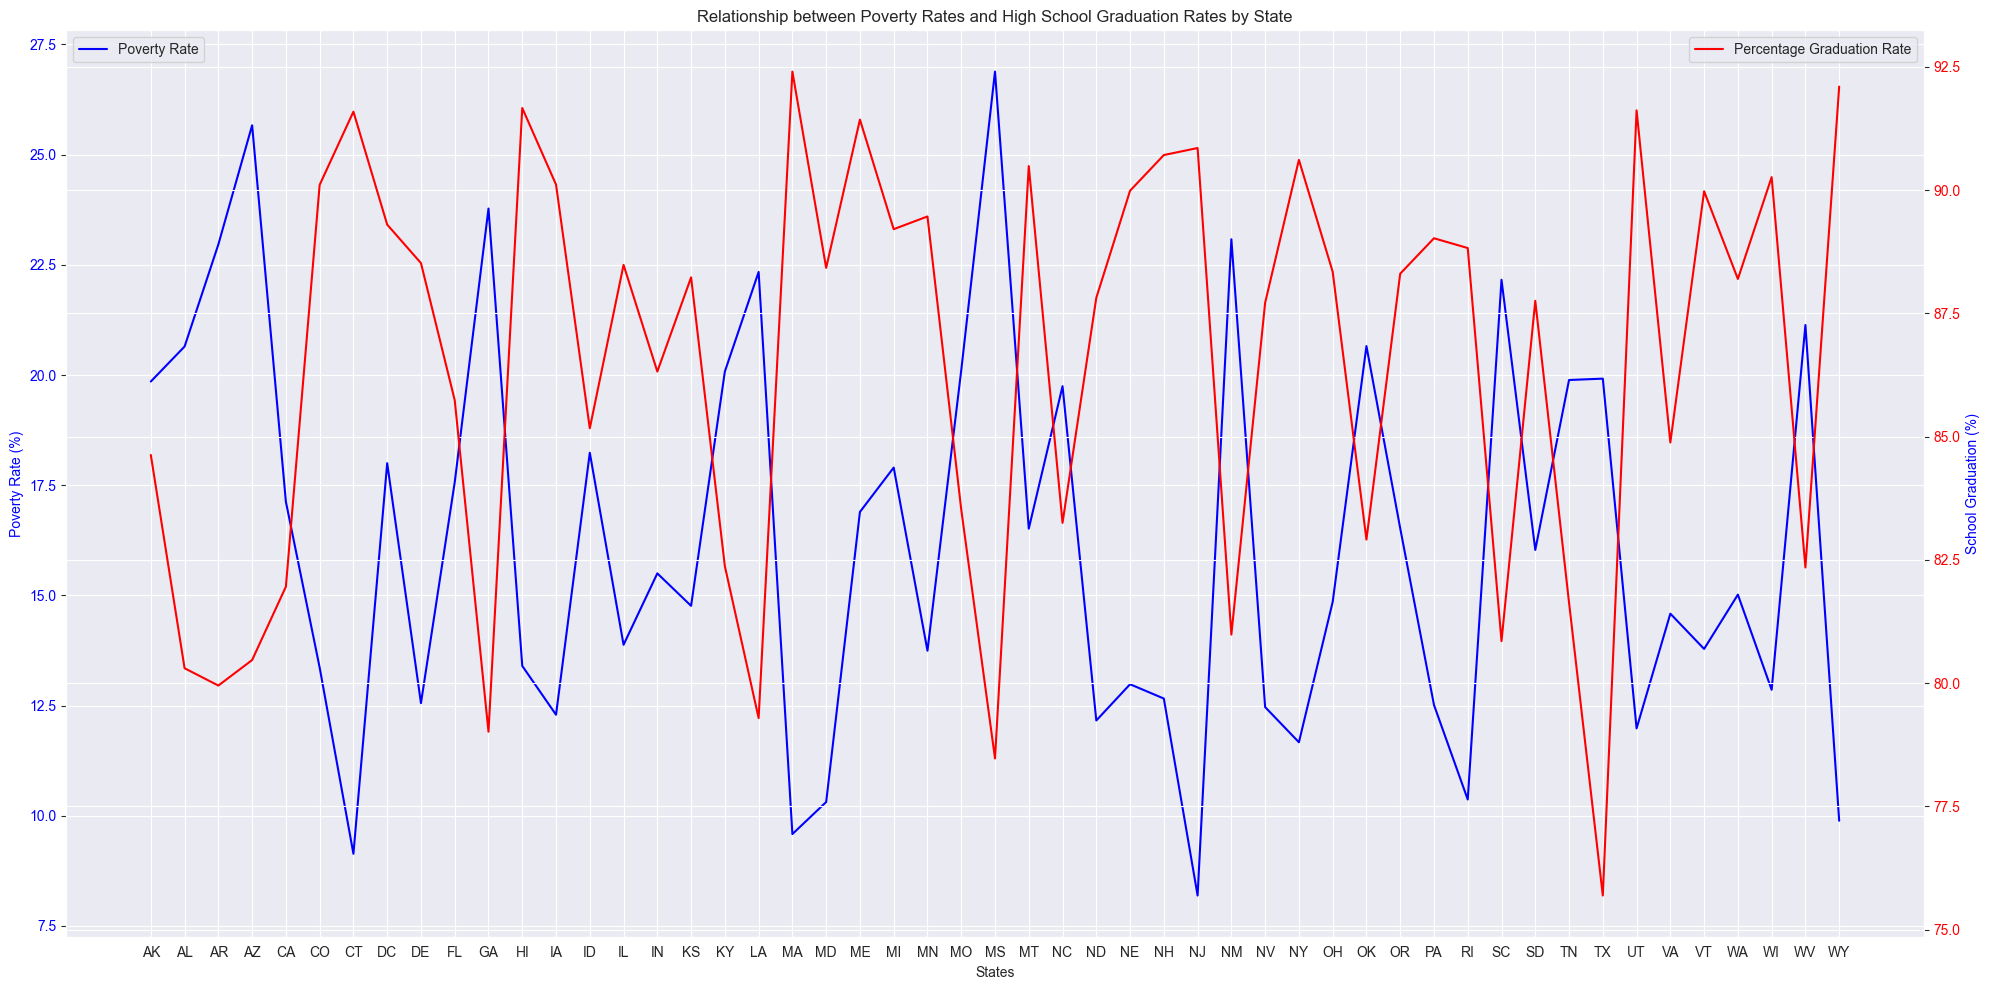

In [15]:
# create subplots
fig, ax1 = plt.subplots(figsize=(20, 10))

# first plot (poverty rate)
ax1.set_xlabel('States')
ax1.set_ylabel('Poverty Rate (%)', color='blue')
ax1.plot(df['Geographic Area'], df['poverty_rate'], color='blue', label='Poverty Rate')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# common x axis
ax2 = ax1.twinx()

# second plot (school graduation)
ax2.set_ylabel('School Graduation (%)', color='blue')
ax2.plot(df2['Geographic Area'], df2['percent_completed_hs'], color='red', label='Percentage Graduation Rate')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Relationship between Poverty Rates and High School Graduation Rates by State')
fig.tight_layout()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

Text(0.5, 1.02, 'Relationship between Poverty Rate and High School Graduation Rate')

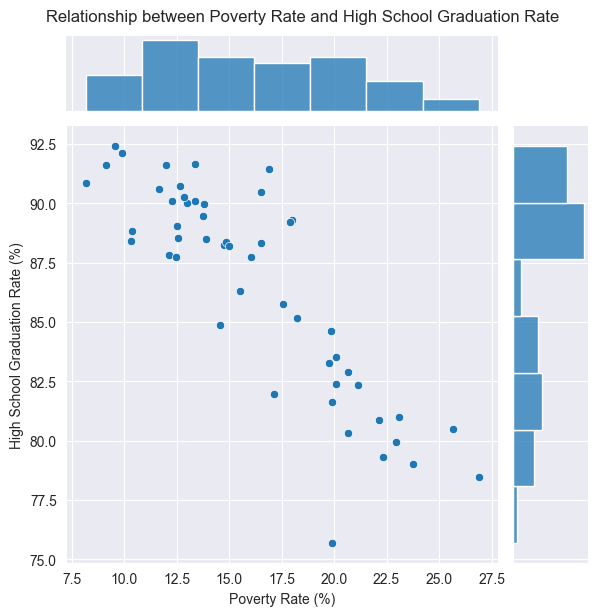

In [16]:
# join plot with scatter plot as kind
sns.jointplot(x=df['poverty_rate'], y=df2['percent_completed_hs'], kind='scatter')

plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.suptitle('Relationship between Poverty Rate and High School Graduation Rate', y=1.02)

Text(0.5, 1.02, 'Relationship between Poverty Rate and High School Graduation Rate')

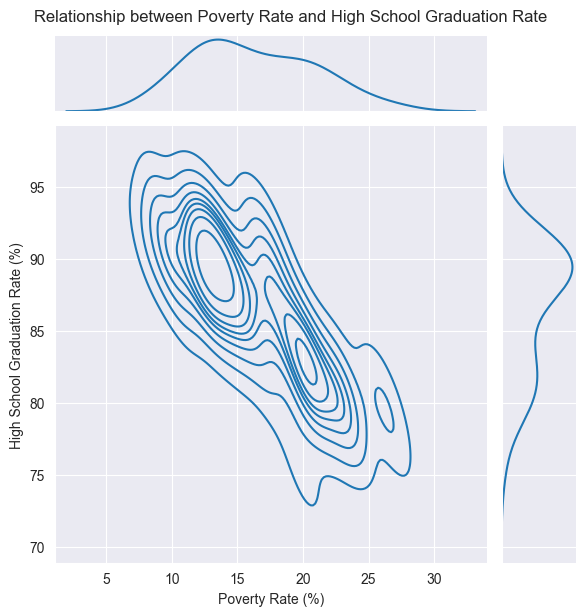

In [17]:
# join plot with KDE plot as kind
sns.jointplot(x=df['poverty_rate'], y=df2['percent_completed_hs'], kind='kde')

plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.suptitle('Relationship between Poverty Rate and High School Graduation Rate', y=1.02)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

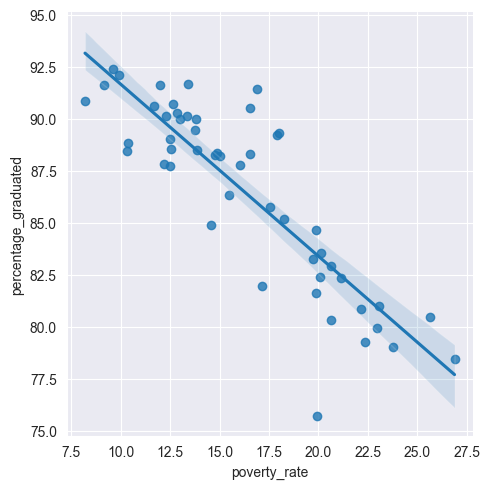

In [18]:
# lmplot

# create new df to use it for lmplot

combined_df = pd.DataFrame({
    'poverty_rate': df['poverty_rate'],
    'percentage_graduated': df2['percent_completed_hs']
}
)

# make lmplot
sns.lmplot(x='poverty_rate', y='percentage_graduated', data=combined_df)

<Axes: xlabel='poverty_rate', ylabel='percentage_graduated'>

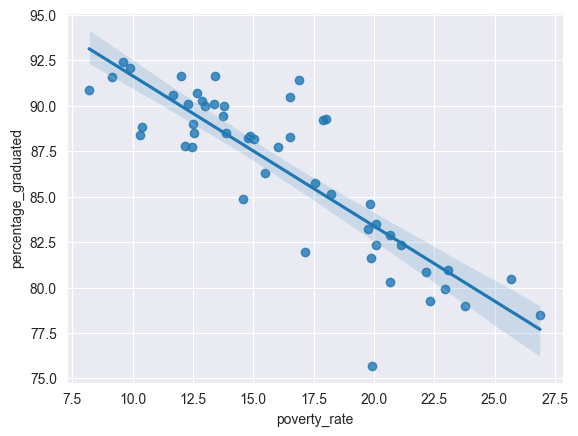

In [19]:
# regplot

sns.regplot(x=combined_df['poverty_rate'], y=combined_df['percentage_graduated'], fit_reg=True)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [20]:
# df share racial 

# drop City column
share_racial_df = df_share_race_city.drop('City', axis=1)

# convert to numerical
share_racial_df[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = \
    share_racial_df[
        ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric,
                                                                                                        errors='coerce')

# group by share
group_by_share = share_racial_df.groupby('Geographic area')[
    ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].mean().reset_index()

array([<Axes: title={'center': 'share_white'}, xlabel='Geographic area'>,
       <Axes: title={'center': 'share_black'}, xlabel='Geographic area'>,
       <Axes: title={'center': 'share_native_american'}, xlabel='Geographic area'>,
       <Axes: title={'center': 'share_asian'}, xlabel='Geographic area'>,
       <Axes: title={'center': 'share_hispanic'}, xlabel='Geographic area'>],
      dtype=object)

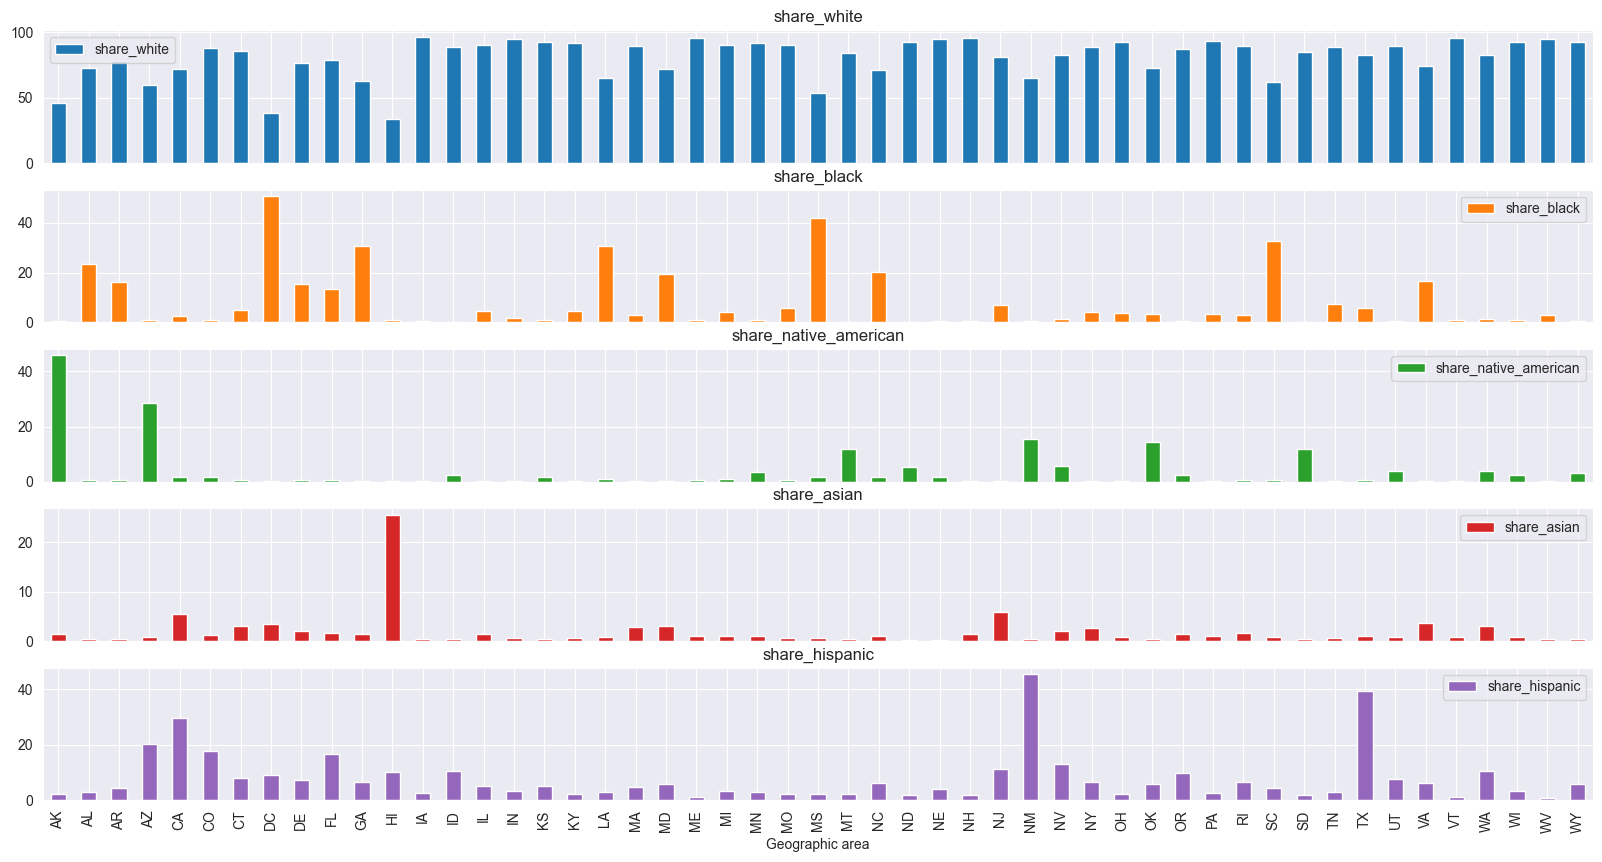

In [21]:
# bar chart

# make it to df
df_share = pd.DataFrame(group_by_share)

df_share.plot(subplots=True, figsize=(20, 10), kind='bar', x='Geographic area', legend=True)

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

<Axes: title={'center': 'Percentage of people killed by Race'}, ylabel='count'>

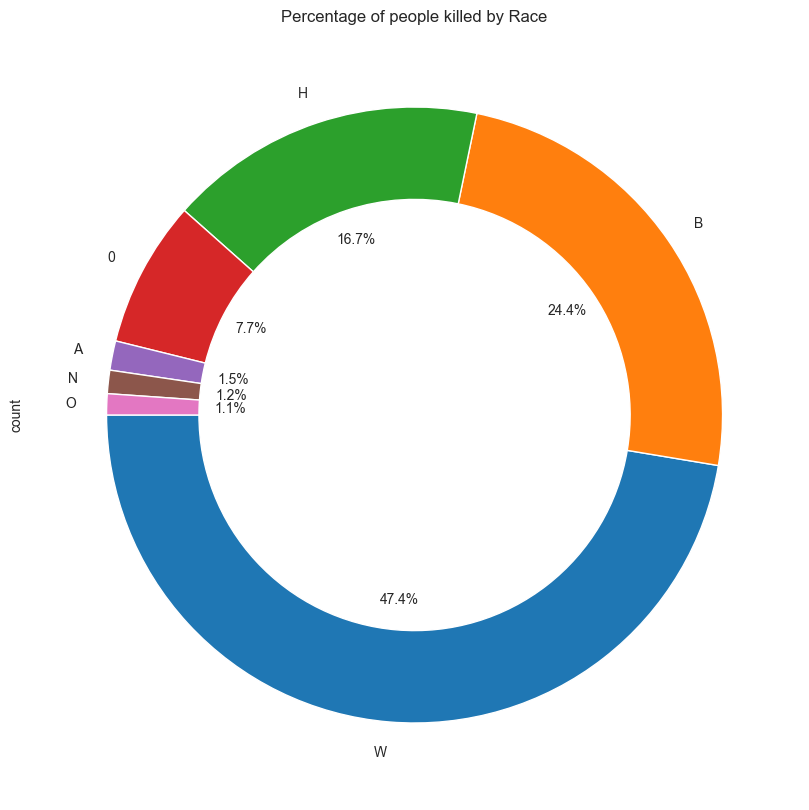

In [22]:
plt.title('Percentage of people killed by Race')

# delete the count title on y-axis

df_fatalities['race'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(20, 10), wedgeprops={'width': 0.3},
                                          startangle=180)

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

<Axes: title={'center': 'Percentage of people killed by Gender'}, xlabel='gender', ylabel='Number of Fatalities'>

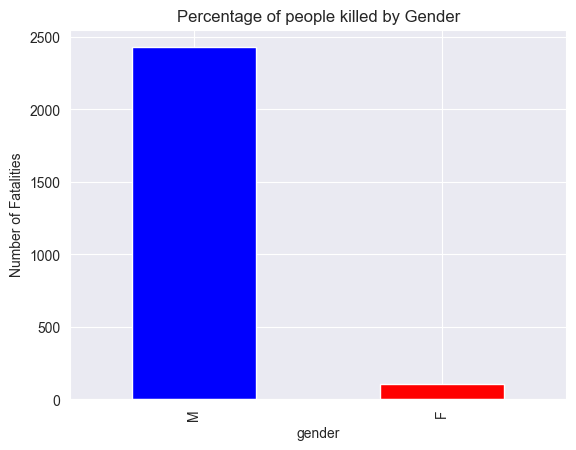

In [23]:
plt.title('Percentage of people killed by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fatalities')
df_fatalities['gender'].value_counts().plot(kind='bar', color=['blue', 'red'])



In [24]:
# find the men and women who died
men = [person for person in df_fatalities['gender'] if person == 'M']
women = [person for person in df_fatalities['gender'] if person == 'F']
print(f'Men died: {len(men)}')
print(f'Women died: {len(women)}')

Men died: 2428
Women died: 107


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [25]:
df_fatalities

id                name      date   manner_of_death       armed   age  \
0        3          Tim Elliot  02/01/15              shot         gun 53.00   
1        4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2        5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3        8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4        9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   
...    ...                 ...       ...               ...         ...   ...   
2530  2822    Rodney E. Jacobs  28/07/17              shot         gun 31.00   
2531  2813               TK TK  28/07/17              shot     vehicle  0.00   
2532  2818  Dennis W. Robinson  29/07/17              shot         gun 48.00   
2533  2817       Isaiah Tucker  31/07/17              shot     vehicle 28.00   
2534  2815        Dwayne Jeune  31/07/17              shot       knife 32.00   

     gender race           city state  signs_of_mental_illness threat_level  \
0         M    A        Shelton    WA                     True       attack   
1         M    W          Aloha    OR                    False       attack   
2         M    H        Wichita    KS                    False        other   
3         M    W  San Francisco    CA                     True       attack   
4         M    H          Evans    CO                    False       attack   
...     ...  ...            ...   ...                      ...          ...   
2530      M    0    Kansas City    MO                    False       attack   
2531      M    0    Albuquerque    NM                    False       attack   
2532      M    0          Melba    ID                    False       attack   
2533      M    B        Oshkosh    WI                    False       attack   
2534      M    B       Brooklyn    NY                     True       attack   

             flee  body_camera  
0     Not fleeing        False  
1     Not fleeing        False  
2     Not fleeing        False  
3     Not fleeing        False  
4     Not fleeing        False  
...           ...          ...  
2530  Not fleeing        False  
2531          Car        False  
2532          Car        False  
2533          Car         True  
2534  Not fleeing        False  

[2535 rows x 14 columns]

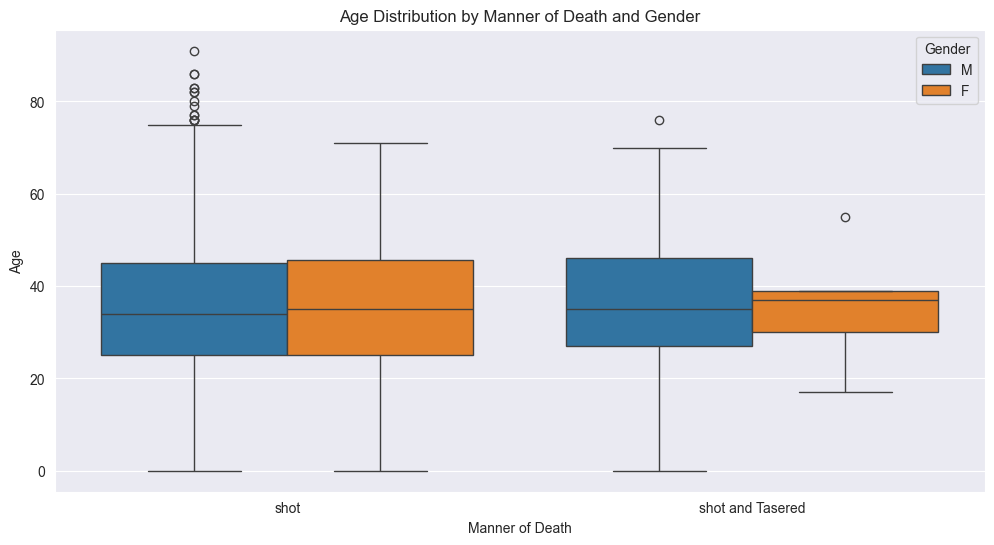

In [26]:
# figure size
plt.figure(figsize=(12, 6))

# create box plot
sns.boxplot(data=df_fatalities, x='manner_of_death', y='age', hue='gender')

# add details
plt.title('Age Distribution by Manner of Death and Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.legend(title='Gender')

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

<Axes: ylabel='count'>

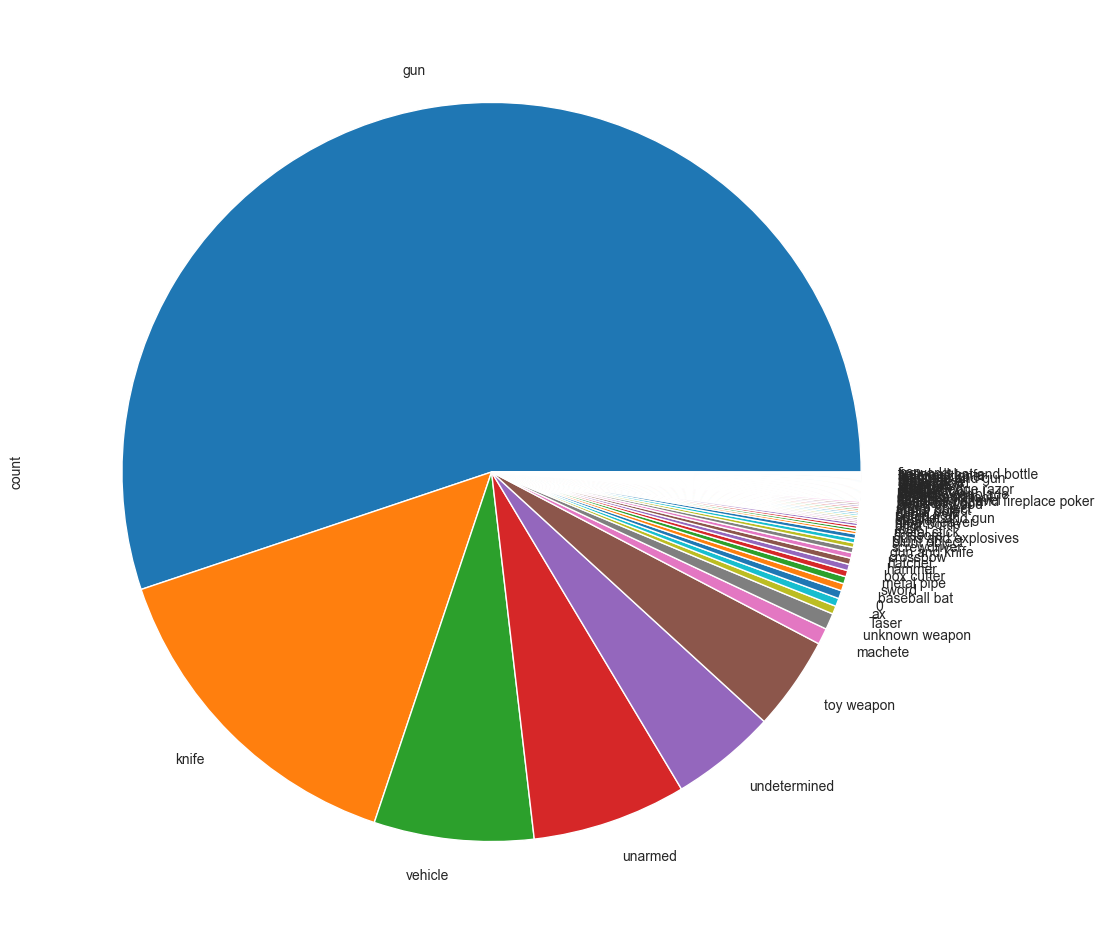

In [27]:
plt.figure(figsize=(20, 12))

df_fatalities['armed'].value_counts().plot(kind='pie', normalize=True)

In [28]:
# find the percentage of people who were armed

# find the total count of armed
count_armed = len(df_fatalities['armed'])

# find the people who were armed
armed_people = [person for person in df_fatalities['armed'] if person != 'unarmed']

# number of armed
armed_len = len(armed_people)

# find the percentage of people who were armed
print(f'Percentage of people who were armed: {(armed_len / count_armed) * 100}%')

# unarmed people
unarmed_people = count_armed - armed_len
print(f'Percentage of people who were unarmed: {unarmed_people / count_armed * 100}%')

# check if the result is correct
print((armed_len + unarmed_people == count_armed))

Percentage of people who were armed: 93.25443786982248%
Percentage of people who were unarmed: 6.7455621301775155%
True


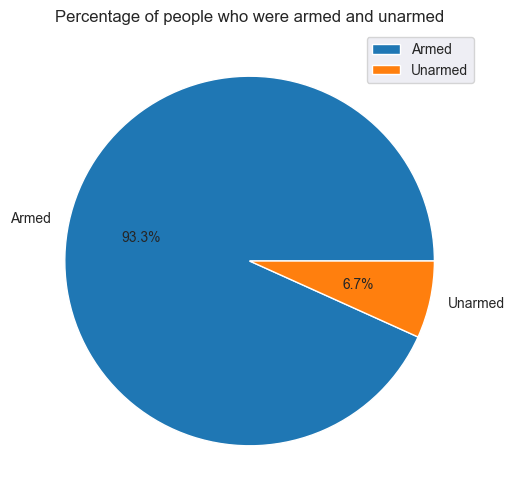

In [29]:
# plot them
plt.figure(figsize=(12, 6))
# create the 2 categories
categories = ['Armed', 'Unarmed']

# percentages
percentages = [(armed_len / count_armed) * 100, (unarmed_people / count_armed) * 100]

# pie plot
plt.pie(percentages, labels=categories, autopct='%1.1f%%')

plt.title('Percentage of people who were armed and unarmed')
plt.legend()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [30]:
# age under 25
age_under = len(df_fatalities[df_fatalities['age'] < 25])

# total people
total_number_age = len(df_fatalities['age'])

# percentage
percentage = (age_under / total_number_age) * 100
print(f'Percentage of people who were under age: {percentage}%')

Percentage of people who were under age: 20.78895463510848%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [31]:
# drop rows with value 0 as age

index_age = df_fatalities[df_fatalities['age'] == 0].index
df_fatalities = df_fatalities.drop(index_age)

Text(0, 0.5, 'Count')

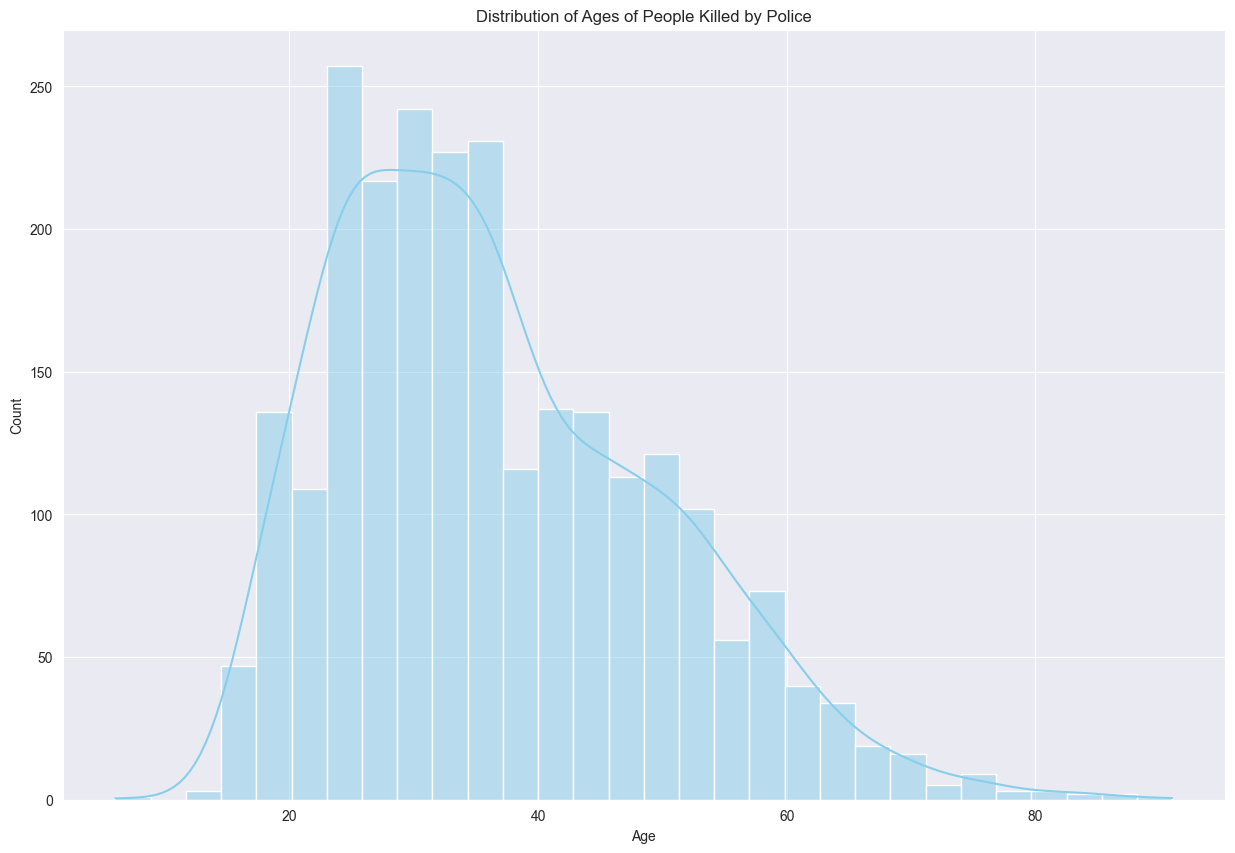

In [32]:
plt.figure(figsize=(15, 10))

sns.histplot(data=df_fatalities, x='age', kde=True, bins=30, color='skyblue')

plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Count')

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

Text(0, 0.5, 'Density')

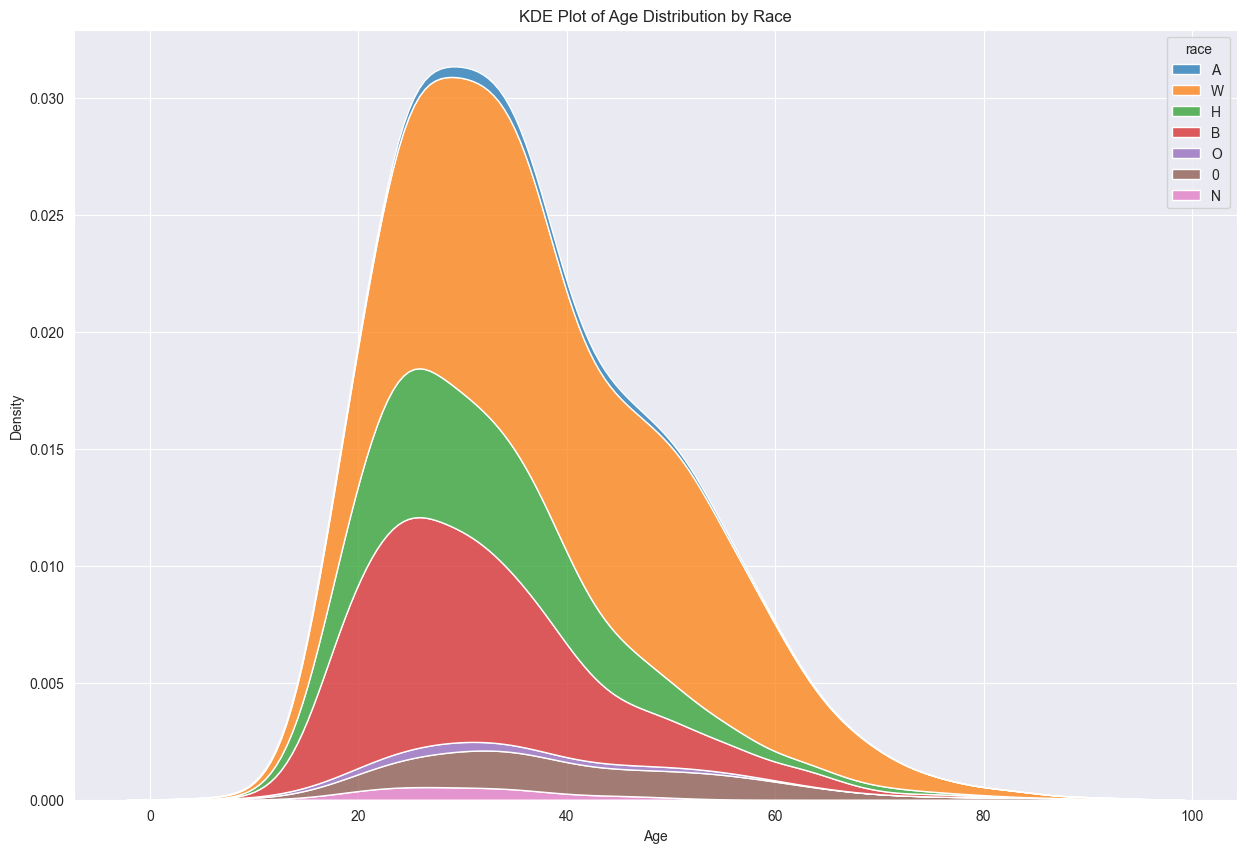

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.kdeplot(data=df_fatalities, x='age', hue='race', multiple='stack')
plt.title('KDE Plot of Age Distribution by Race')
plt.xlabel('Age')
plt.ylabel('Density')

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

Text(0, 0.5, 'Count')

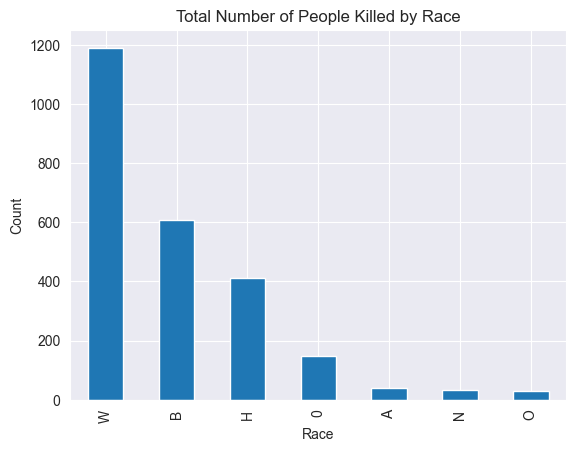

In [45]:
df_fatalities['race'].value_counts().plot(kind='bar')

plt.title('Total Number of People Killed by Race')
plt.xlabel('Race')
plt.ylabel('Count')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [55]:
# create empty list to story the number of mentally ill people
mentally_ill_people = list()

# create empty list to store the number of non mentally ill people
not_mentally_ill_people = list()

# find them and store them
for person_ill in df_fatalities['signs_of_mental_illness']:
    if person_ill:
        mentally_ill_people.append(person_ill)
    else:
        not_mentally_ill_people.append(person_ill)

# total number of people
total_people = len(df_fatalities['signs_of_mental_illness'])

# find the number  of mentally ill people
number_of_mentally_ill = len(mentally_ill_people)

# find the percentage number of mentally ill people
number_of_not_mentally_ill_people = len(not_mentally_ill_people)

print(f'Percentage of mentally ill people: {number_of_mentally_ill}')
print(f'Percentage of non mentally ill people: {number_of_not_mentally_ill_people}')

Percentage of mentally ill people: 619
Percentage of non mentally ill people: 1839


([<matplotlib.patches.Wedge at 0x1be37223ad0>,
 [Text(0.7733309921450562, 0.7822781964160469, 'blue'),
  Text(-0.773330783873852, -0.7822784023051216, 'red')],
 [Text(0.4218169048063942, 0.42669719804511647, '25.2%'),
  Text(-0.42181679120391924, -0.4266973103482481, '74.8%')])

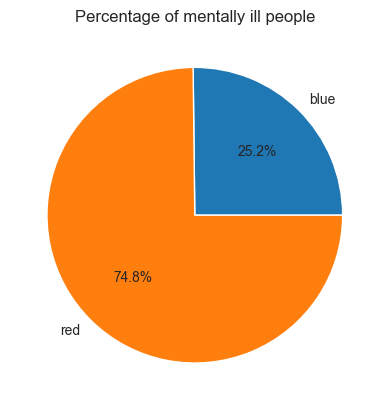

In [60]:
# display the percentage

# for ill
percentage_ill = (number_of_mentally_ill / total_people) * 100

# for non-ill
percentage_non_ill = (number_of_not_mentally_ill_people / total_people) * 100

plt.title('Percentage of mentally ill people')

# store the values for the pie chart
people = [percentage_ill, percentage_non_ill]
colors = ['blue', 'red']

plt.pie(people, labels=colors, autopct='%1.1f%%')

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

<Axes: title={'center': 'Top 10 cities with most deaths.'}, xlabel='city', ylabel='Count'>

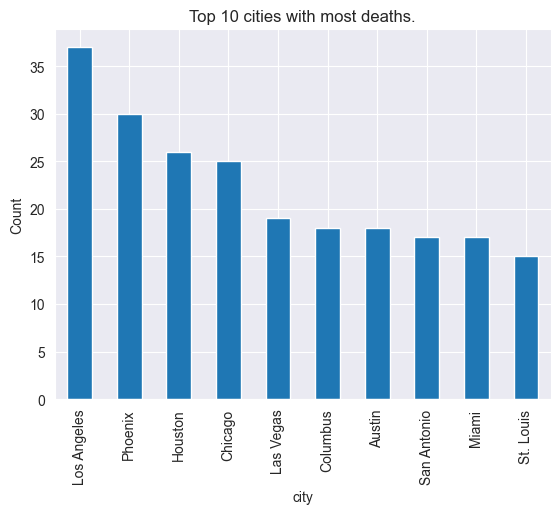

In [66]:
# city column!]
plt.title('Top 10 cities with most deaths.')
plt.ylabel('Count')
df_fatalities['city'].value_counts().head(10).plot(kind='bar')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [81]:
top_cities = df_fatalities['city'].value_counts().head(10).index

top_cities_data = df_fatalities[df_fatalities['city'].isin(top_cities)]

race_death_counts = top_cities_data.groupby(['city', 'race']).size().unstack(fill_value=0)

race_death_percentage = race_death_counts.div(race_death_counts.sum(axis=1), axis=0) * 100

race_death_percentage

race            0    A     B     H     N    O     W
city                                               
Austin       0.00 0.00 16.67 11.11  0.00 0.00 72.22
Chicago      4.00 0.00 84.00  4.00  0.00 0.00  8.00
Columbus     5.56 0.00 55.56  0.00  0.00 5.56 33.33
Houston      3.85 3.85 57.69 19.23  3.85 0.00 11.54
Las Vegas   10.53 0.00 15.79 26.32  0.00 0.00 47.37
Los Angeles  5.41 2.70 27.03 48.65  0.00 0.00 16.22
Miami        0.00 0.00 47.06 35.29  0.00 0.00 17.65
Phoenix      6.67 0.00  6.67 36.67 10.00 0.00 40.00
San Antonio  0.00 0.00 17.65 70.59  0.00 0.00 11.76
St. Louis    6.67 0.00 73.33  0.00  0.00 0.00 20.00

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [82]:
import plotly.express as px

state_death_counts = df_fatalities['state'].value_counts().reset_index()
state_death_counts.columns = ['state', 'death_count']

fig = px.choropleth(
    state_death_counts,
    locations='state',
    locationmode="USA-states",
    color='death_count',
    color_continuous_scale="Reds",
    scope="usa",
    title="Police Killings by US State"
)

fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.show()


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [90]:
# convert column date to date time
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

In [93]:
# split it by year, month, date
df_fatalities['year'] = df_fatalities['date'].dt.year

# split it by month
df_fatalities['month'] = df_fatalities['date'].dt.month

# split it by date
df_fatalities['day'] = df_fatalities['date'].dt.day

In [ ]:
sorted_years = df_fatalities['year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sorted_years.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Police Killings Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.xticks(sorted_years.index)

([<matplotlib.axis.XTick at 0x1be37167c50>,
 [Text(2015, 0, '2015'), Text(2016, 0, '2016'), Text(2017, 0, '2017')])

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).